## Visualizer

this script visualizes the collected data  
it create aggregations for the GUI, e.g. lists of all tags, libraries and so on

In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import json
import math
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [3]:
# generic store data to file function
def store_data(data, file, mode='w', toJson=False):
    if toJson:
        data = json.dumps(data)
    with open(file, mode, encoding='utf-8') as fp:
        result = fp.write(data)
        return result
    
# generic load data from file function
def load_data(file, fromJson=False):
    if os.path.isfile(file):
        with open(file, 'r', encoding='utf-8', errors="ignore") as fp:
            data = fp.read()
            if fromJson:
                data = json.loads(data)
            return data
    else:
        return 'file not found'

# test text
#print(store_data('Hello', '../data/repositories/mlart/test.txt'))
#print(load_data('../data/repositories/mlart/test.txt'))

# test json
#print(store_data({'msg':'Hello World'}, '../data/repositories/mlart/test.json', toJson=True))
#print(load_data('../data/repositories/mlart/test.json', fromJson=True))

#store_data(result[0]['html'], '../data/repositories/kaggle/notebook.html')
#store_data(result[0]['iframe'], '../data/repositories/kaggle/kernel.html')

In [4]:
# read in all json files

folder = '../data/database/json/'
subfolder = os.listdir(folder)
#print(subfolder)

df = pd.DataFrame()

quit = 0
i = 0
for item in subfolder:
    fp = os.path.join(folder, item)
    if os.path.isdir(fp):
        print('###')
        print('files:', item)
        files = os.listdir(fp)
        print(len(files))
        for file in files:
            data = load_data(os.path.join(folder, item, file), fromJson=True)
            #print(data)
            df = df.append(data, ignore_index=True)
            
            i += 1
            
            if i%100 == 0:
                print(i)
            
            if quit!= 0 and i >= quit:
                break
    if quit!= 0 and i >= quit:
                break
            
print(df.shape)
print(df.head())

###
files: bc
541
100
200
300
400
500
###
files: bcg
16
###
files: gh
433
600
700
800
900
###
files: ka_c
217
1000
1100
1200
###
files: ka_cn
2082
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
###
files: ma
389
3300
3400
3500
3600
###
files: me
14
###
files: tcp
172
3700
3800
###
files: tmp
229
3900
4000
###
files: za
58
4100
(4151, 55)
                           category  category_score compete_score  \
0        Construction & Engineering             0.0           0.0   
1                Wholesale & Retail             0.0           0.0   
2              Education & Research             0.0           0.0   
3              Education & Research             0.0           0.0   
4  Biotechnological & Life Sciences             0.0           0.0   

          date_project         date_scraped  \
0  2017-10-05 21:41:57  2020-12-20 09:48:53   
1  2020-11-08 07:38:20  2020-12-19 23:07:15   
2  2017-07-27 14:27:10  2020-12-19 23:14:04   
3  2

In [5]:
# get shape
df.shape

(4151, 55)

In [6]:
# store for later use
path = '../data/database/.temp/all.csv'
df.to_csv(path, sep=';', index=False)

In [7]:
# read from file
path = '../data/database/.temp/all.csv'
#df = pd.read_csv(path, sep=';')

In [8]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   category                         3922 non-null   object 
 1   category_score                   3922 non-null   float64
 2   compete_score                    4151 non-null   object 
 3   date_project                     4097 non-null   object 
 4   date_scraped                     3872 non-null   object 
 5   description                      4151 non-null   object 
 6   description_category             2507 non-null   object 
 7   description_category_runtime     2507 non-null   float64
 8   description_category_score       2507 non-null   float64
 9   description_lemmatized           4151 non-null   object 
 10  description_subcategory          2507 non-null   object 
 11  description_subcategory_runtime  2507 non-null   float64
 12  description_subcateg

In [9]:
# aggregate some values for form guidance on GUI
form_guide = {}
def add_guide(key, df_col, drop=[], show=False, sort=False):
    global form_guide
    # drop nan and convert to list
    val = df_col.dropna().values.tolist()
    # make unique
    val = list(set(val))
    # drop items
    for item in drop:
        if item in val:
            val.remove(item)
    # sort list
    if sort == True:
        val.sort()
    # store items
    form_guide[key] = val
    
    if show == True:
        print(form_guide[key])

In [10]:
# diagram function
def chart_feature(feature, df=df, x=10, y=10, label=None, legend=1, columns=1, stacked=True,
                  save=True, printValues=False, sort_index=False,
                  truncate_start=0, truncate=0, position='best', margins=[],
                  kill=[], rename={}, colormap='Spectral'):
    
    if sort_index == True:
        n = df[feature].value_counts().sort_index()
    else:
        n = df[feature].value_counts()
    
    if truncate != 0:
        n = n[0:truncate]
    if truncate_start != 0:
        n = n[truncate_start:]
    if label == None:
        label = feature
        
    for item in kill:
        if item in n:
            n.pop(item)
    
    for key in rename.keys():
        n[rename[key]] = n.pop(key)
    
    df2=pd.DataFrame([n], index=[''])
    #df2.columns = ['key', 'value']
    #df2.sort_values(by='value', ascending=True)
    
    #print(list(df2.columns.values))
    
    if printValues:
        print(df2)
    
    # https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
    # http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
    
    ax = df2.plot(kind='bar', stacked=stacked, figsize=(x,y), title=label, colormap=colormap)
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines[:], labels[::legend], loc=position, ncol=columns)
    #ax.margins(0, 0)
    #ax.set_ylim([-1,19])
    if len(margins) > 0:
        ax.set_xlim(margins)
    #ax.margins(.05)
    fig = ax.get_figure()
    if save == True:
        name = label if label != None else str(feature)
        fig.savefig(name + '.png', dpi=300)

['Accommodation & Food', 'Accounting', 'Agriculture', 'Banking & Insurance', 'Biotechnological & Life Sciences', 'Construction & Engineering', 'Economics', 'Education & Research', 'Emergency & Relief', 'Finance', 'Government and Public Works', 'Healthcare', 'Justice, Law and Regulations', 'Manufacturing', 'Media & Publishing', 'Miscellaneous', 'Physics', 'Real Estate, Rental & Leasing', 'Utilities', 'Wholesale & Retail']


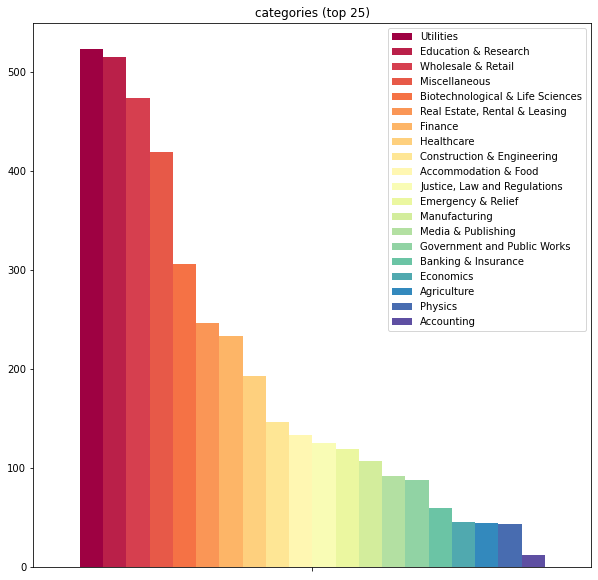

In [11]:
df['category_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['category']]
df['category_list'] = ['None' if x == '' else x for x in df['category_list']]
truncate = 25
chart_feature('category_list', stacked=False, sort_index=False, margins=[-0.3, 0.3], truncate=truncate, truncate_start=0, label='categories (top '+str(truncate)+')')

add_guide('categories', df['category_list'], drop=['None'], sort=True, show=True)

mean: 0.4 median: 0.3


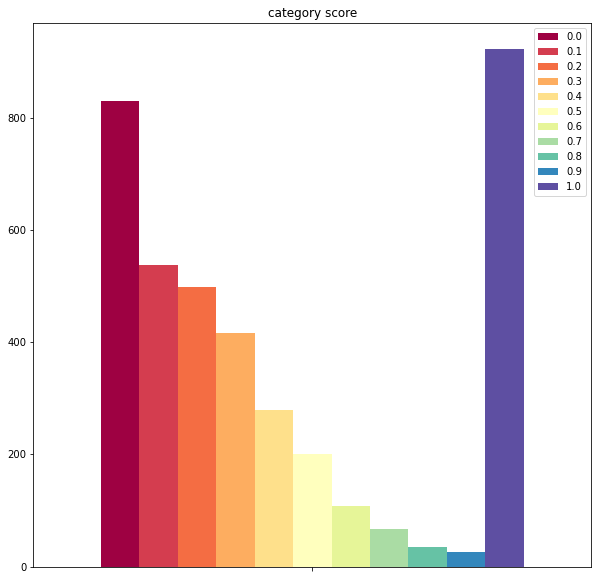

In [12]:
df['category_score_round'] = [round(x,1) for x in df['category_score']]
chart_feature('category_score_round', stacked=False, sort_index=True, margins=[-0.33, 0.33], label='category score')
print('mean:', round(df['category_score'].mean(),1), 'median:', round(df['category_score'].median(),1))

['Accomodation', 'Ambulance:', 'Analytics', 'Art', 'Betting', 'Charities', 'Chemoinformatics and drug discovery', 'Coal, Oil & Gas', 'Computational', 'Construction', 'Consumer Financial', 'Crime', 'Data', 'Data, Parsing and APIs', 'Development', 'Disaster Management', 'Economics', 'Election Analysis', 'Electricity', 'Engineering', 'Entertainment', 'Failure', 'Food', 'Fraud', 'General', 'Genomics', 'Insurance and Risk', 'Judicial Applied', 'Life-sciences', 'Machine Learning', 'Maintenance', 'Management and Operations', 'Marketing', 'Material Science', 'Physical', 'Policy and Regulatory', 'Politics', 'Preventative and Reactive', 'Quality', 'Real Estate', 'Rental & Leasing', 'Restaurant', 'Retail', 'School', 'Sequencing', 'Social Policies', 'Student', 'Textual Analysis', 'Tools', 'Tourism', 'Trading & Investment', 'Transportation', 'Valuation', 'Water & Pollution', 'Wholesale']


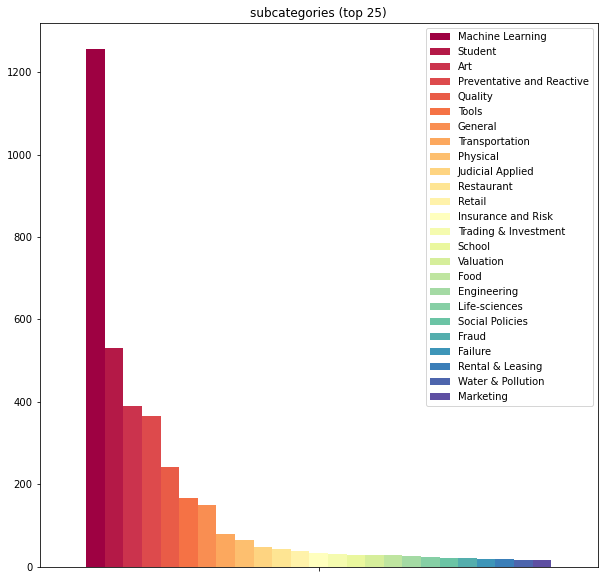

In [13]:
def str_to_list(s):
    if isinstance(s, str):
        s = s.replace("'", "").replace(' ,', ',').replace(
            '[', '').replace(']', '').split(',')
        s = [i.strip() for i in s if i]
        s = ', '.join(s)
    return s

df['subcategory_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['subcategory']]
df['subcategory_list'] = ['None' if x == '' else str_to_list(x) for x in df['subcategory_list']]
truncate = 25
chart_feature('subcategory_list', stacked=False, sort_index=False, margins=[-0.3, 0.3], truncate=truncate, truncate_start=0, label='subcategories (top '+str(truncate)+')')

add_guide('subcategories', df['subcategory_list'], drop=['None'], sort=True, show=True)

mean: 0.6 median: 0.7


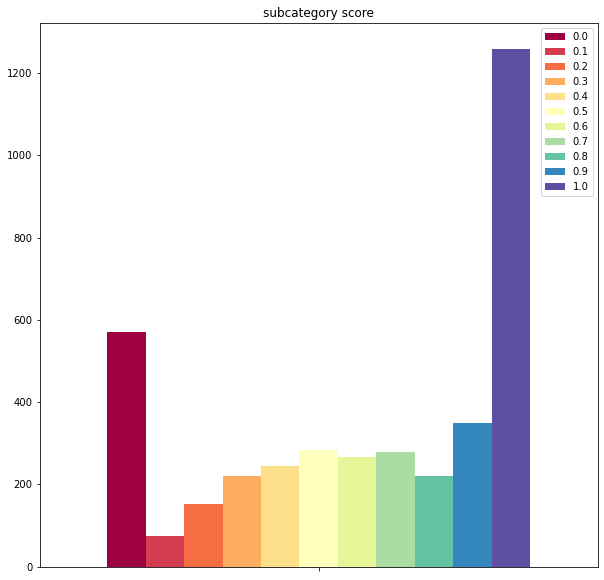

In [42]:
df['subcategory_score_round'] = [round(x,1) for x in df['subcategory_score']]
chart_feature('subcategory_score_round', stacked=False, sort_index=True, margins=[-0.33, 0.33], label='subcategory score')
print('mean:', round(df['subcategory_score'].mean(),1), 'median:', round(df['subcategory_score'].median(),1))

True    4151
Name: title_flat, dtype: int64


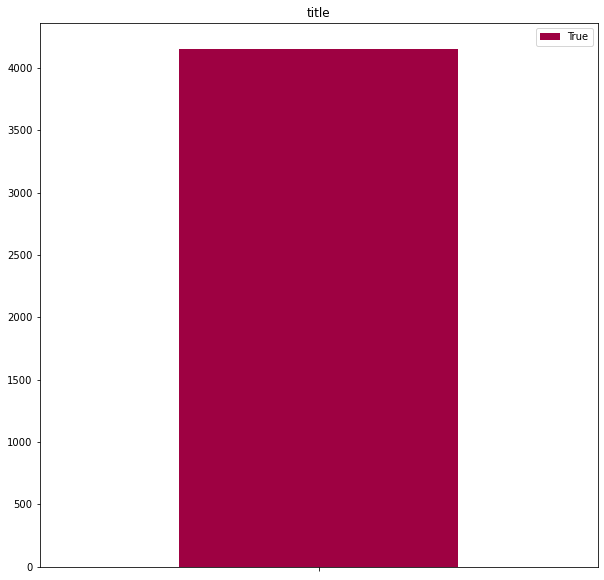

In [15]:
df['title_flat'] = [False if x == '' else True for x in df['title']]
chart_feature('title_flat', stacked=False, label='title') #, colormap='RdYlBu'
print(df['title_flat'].value_counts())

True     4092
False      59
Name: description_flat, dtype: int64


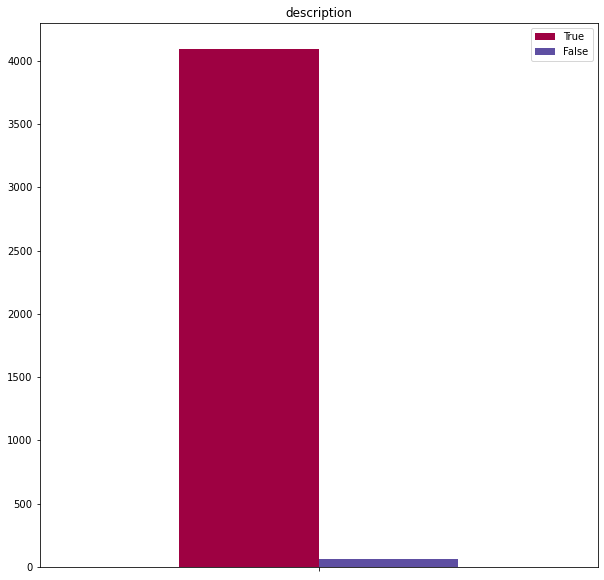

In [16]:
df['description_flat'] = [False if x == '' else True for x in df['description']]
chart_feature('description_flat', stacked=False, label='description')
print(df['description_flat'].value_counts())

english       3974
afrikaans       63
italian         16
portuguese      12
german          10
vietnamese       9
danish           8
catalan          7
french           7
norwegian        6
romanian         5
filipino         5
slovak           4
spanish          3
finnish          3
dutch            3
somali           2
indonesian       2
swedish          2
latvian          2
japanese         2
czech            1
turkish          1
russian          1
lithuanian       1
thai             1
Name: language, dtype: int64


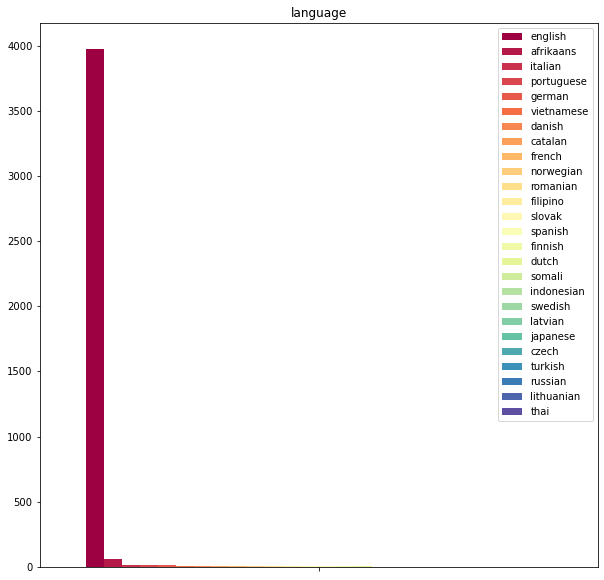

In [17]:
#df['language_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['language']]
#df['language_list'] = ['None' if x == '' else x for x in df['language_list']]
chart_feature('language', stacked=False, label='language', margins=[-0.3, 0.3])

#add_guide('host', df['host'], drop=['None'], show=True)
print(df['language'].value_counts())

english    3974
other       177
Name: language_list, dtype: int64


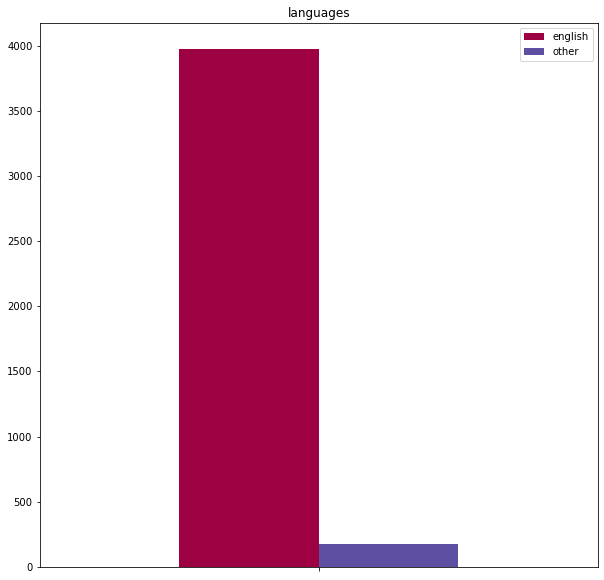

In [18]:
df['language_list'] = [x if x == 'english' else 'other' for x in df['language']]
chart_feature('language_list', stacked=False, label='languages')

#add_guide('host', df['host'], drop=['None'], show=True)
print(df['language_list'].value_counts())

['bcgdv.com', 'github.com', 'kaggle.com', 'medium.com', 'mlart.co', 'thecleverprogrammer.com', 'youtube.com', 'zalando.com']
kaggle.com                 2299
github.com                  974
mlart.co                    389
youtube.com                 229
thecleverprogrammer.com     172
zalando.com                  58
bcgdv.com                    16
medium.com                   14
Name: host, dtype: int64


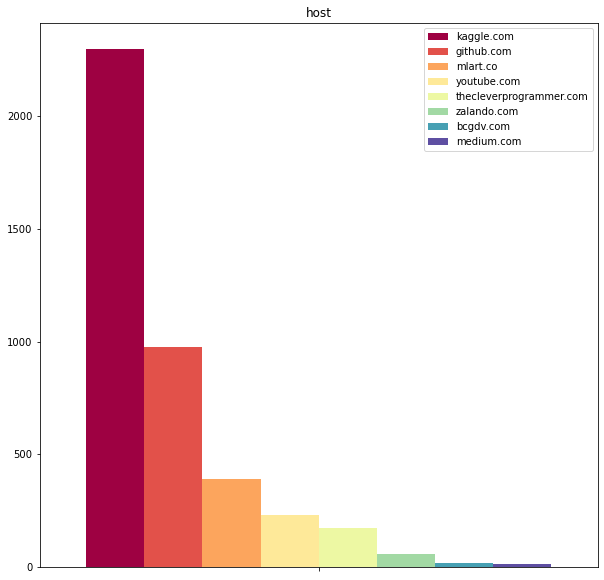

In [19]:
chart_feature('host', stacked=False, margins=[-0.3, 0.3])

add_guide('sources', df['host'], drop=['None'], sort=True, show=True)
print(df['host'].value_counts())

Project (Notebook)                 2082
Project                            1146
Showcase                            389
Paper                               229
Project (Competition) (Dataset)     217
Article                              74
Article Project                      14
Name: kind_list, dtype: int64


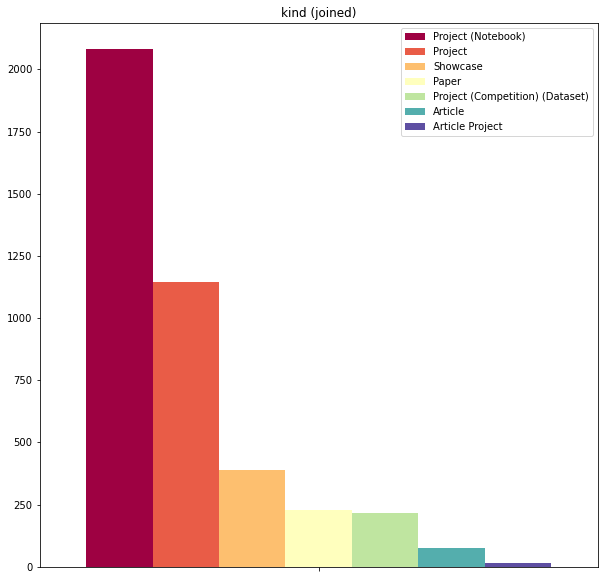

In [20]:
df['kind_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['kind']]
df['kind_list'] = ['None' if x == '' else str_to_list(x) for x in df['kind_list']]
chart_feature('kind_list', stacked=False, label='kind (joined)', margins=[-0.3, 0.3])

#add_guide('host', df['host'], drop=['None'], show=True)
print(df['kind_list'].value_counts())

['(Competition)', '(Dataset)', '(Notebook)', 'Article', 'Paper', 'Project', 'Showcase']
Project          3459
(Notebook)       2082
Showcase          389
Paper             229
(Dataset)         217
(Competition)     217
Article            88
Name: 0, dtype: int64


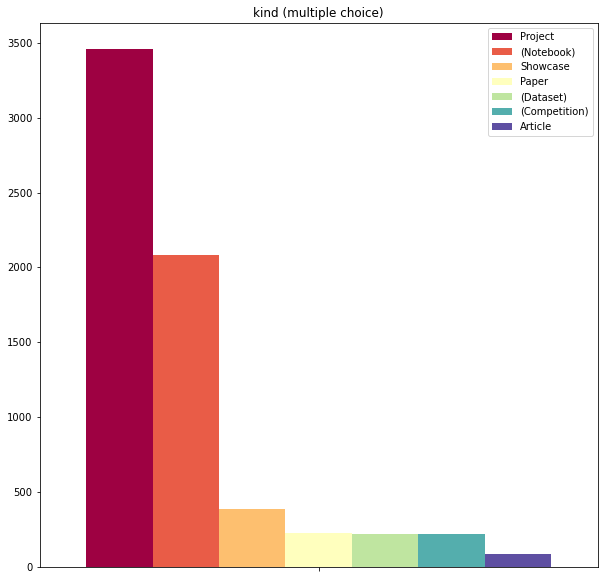

In [21]:
data = []
for item in df['kind']:
    if isinstance(item, list):
        data.extend(item)
    else:
        data.append(item)
    
df2 = pd.DataFrame(data)
rename = {'project': 'Project', 'notebook':'Notebook', 'dataset': '(Dataset)', 'competition': '(Competition)'}
df2[0].replace(rename, inplace=True)

chart_feature(0, stacked=False, sort_index=False, df=df2, truncate=30, label='kind (multiple choice)', margins=[-0.3, 0.3])

add_guide('kinds', df2[0], drop=['None'], sort=True, show=True)
print(df2[0].value_counts())

mean: 0.9 median: 1.0


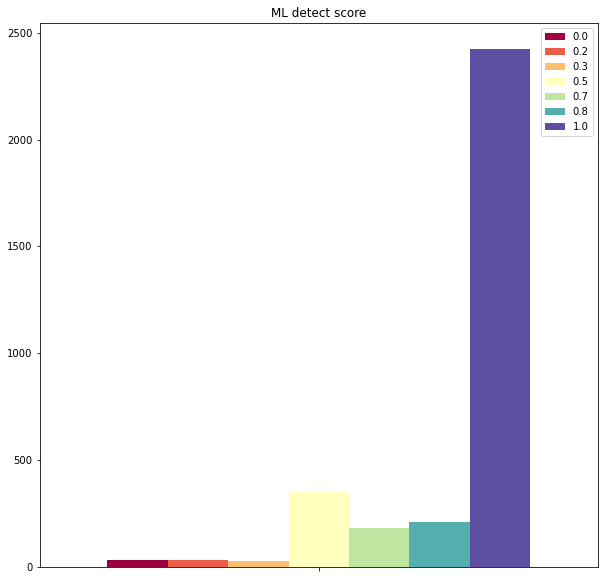

In [43]:
df['ml_score_float'] = [float(x) if x != None else 0 for x in df['ml_score']]
chart_feature('ml_score_float', stacked=False, sort_index=True, label='ML detect score', margins=[-0.33, 0.33])
print('mean:', round(df['ml_score_float'].mean(),1), 'median:', df['ml_score_float'].median())

mean: 0.612 median: 0.7


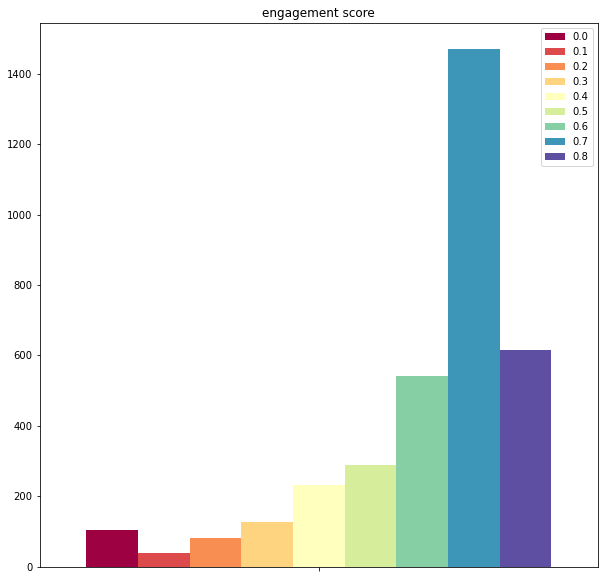

In [23]:
df['engagement_score_round'] = [round(float(x),1) if x != None else 0 for x in df['engagement_score']]
chart_feature('engagement_score_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], label='engagement score')

form_guide['engagement_score'] = {
    'mean': df['engagement_score_round'].mean(),
    'median': df['engagement_score_round'].median(),
}

print('mean:', round(df['engagement_score_round'].mean(),3), 'median:', df['engagement_score_round'].median())

mean: 4.0 median: 1.0


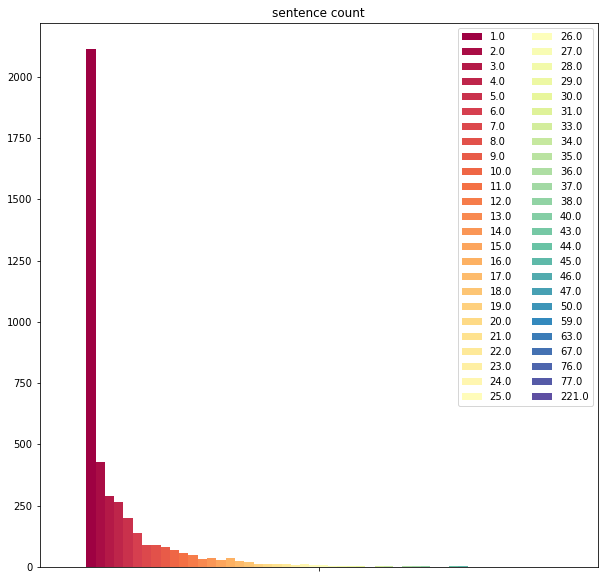

In [24]:
steps = 1
df['sentences_round'] = [round(x/steps,0)*steps for x in df['sentences']]
chart_feature('sentences_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], columns=2, label='sentence count')
print('mean:', round(df['sentences'].mean(),1), 'median:', df['sentences'].median())

mean: 81.6 median: 29.0


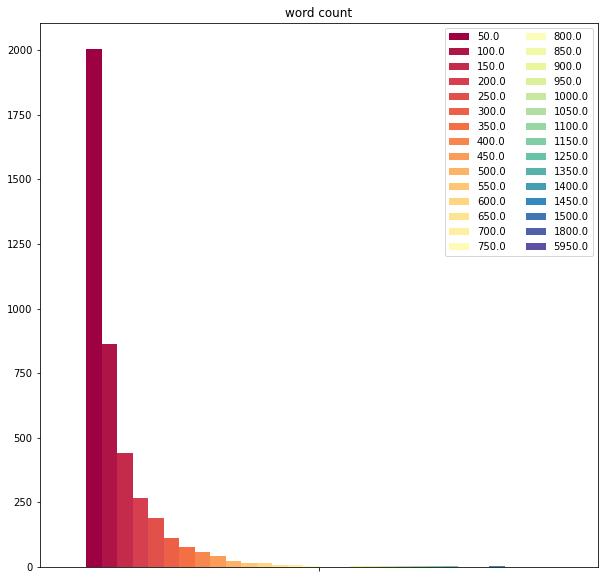

In [25]:
steps = 50
df['words_round'] = [round(x/steps,0)*steps+steps for x in df['words']]
chart_feature('words_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], columns=2, label='word count')
print('mean:', round(df['words'].mean(),1), 'median:', df['words'].median())

0-200    3685
>200      466
Name: words_treshold, dtype: int64


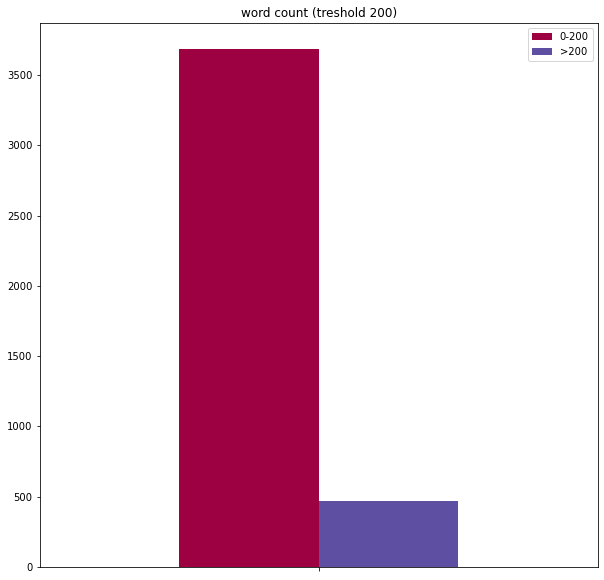

In [26]:
treshold = 200
ts = str(treshold)
df['words_treshold'] = ['0-'+ts if x <= treshold else '>'+ts for x in df['words']]
chart_feature('words_treshold', stacked=False, sort_index=True, truncate=1000, label='word count (treshold '+ts+')')
print(df['words_treshold'].value_counts())

mean: 2.4 median: 1.0


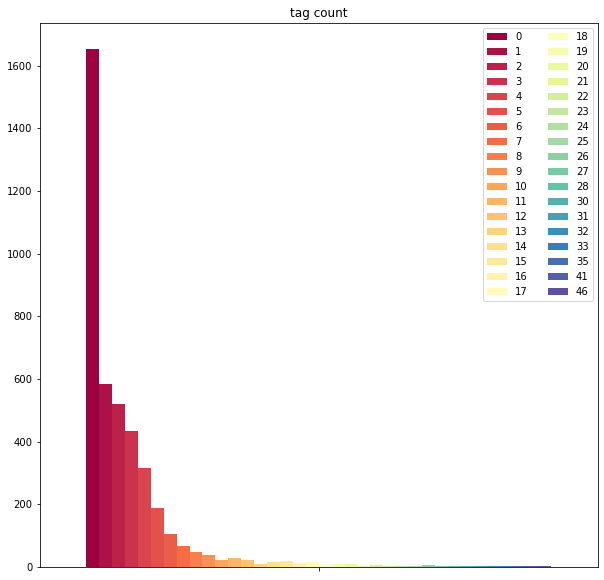

In [27]:
df['tags_count'] = [len(x) for x in df['tags']]
chart_feature('tags_count', stacked=False, sort_index=True, margins=[-0.3, 0.3], columns=2, label='tag count')
print('mean:', round(df['tags_count'].mean(),1), 'median:', df['tags_count'].median())

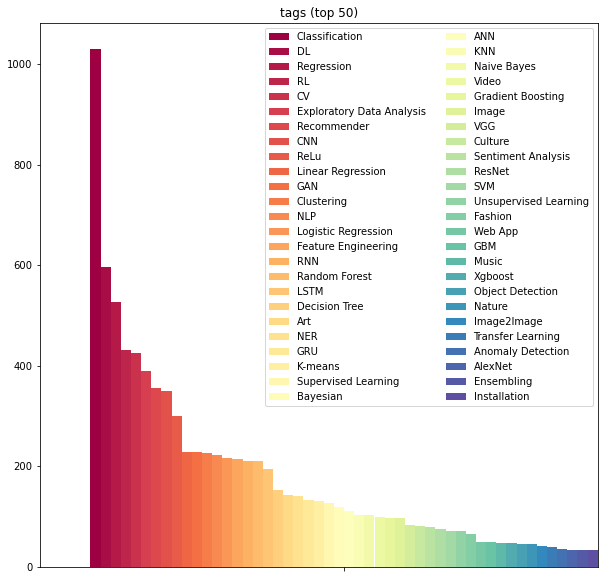

In [28]:
tags = []
for item in df['tags']:
    tags.extend(item)
    
df2 = pd.DataFrame(tags)
truncate = 50
chart_feature(0, stacked=False, sort_index=False, df=df2, margins=[-0.3, 0.25], columns=2, truncate=truncate, label='tags (top '+str(truncate)+')')

add_guide('tags', df2[0], drop=['None'], sort=True, show=False)

['CSS', 'Emacs Lisp', 'Go', 'HTML', 'Java', 'JavaScript', 'Jsonnet', 'Jupyter Notebook', 'Lasso', 'MATLAB', 'OpenEdge ABL', 'Python', 'R', 'R notebook', 'Scala', 'Shell', 'TeX', 'TypeScript']
Jupyter Notebook    2841
Python               284
R notebook            41
HTML                  18
JavaScript            14
                      11
TypeScript             3
Scala                  2
TeX                    2
Shell                  2
CSS                    2
MATLAB                 1
R                      1
Java                   1
Emacs Lisp             1
Jsonnet                1
OpenEdge ABL           1
Lasso                  1
Go                     1
Name: programming_language, dtype: int64


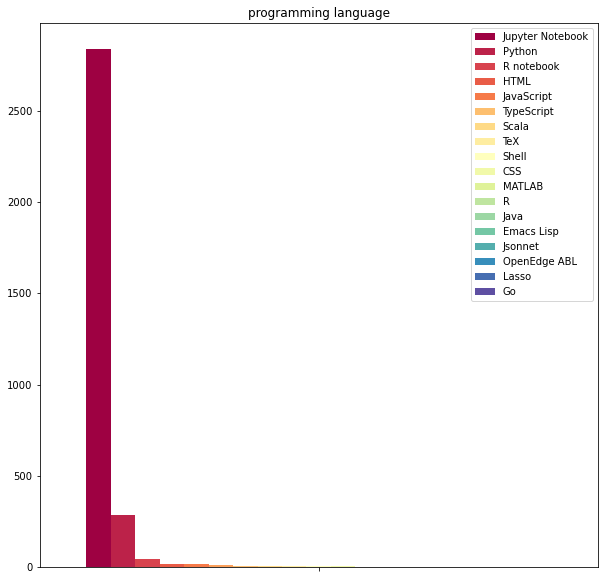

In [29]:
#rename = {'Python notebook': 'Jupyter Notebook'}
#df2 = pd.DataFrame(df['language'])
#df2["language"].replace(rename, inplace=True)

chart_feature('programming_language', stacked=False, margins=[-0.3, 0.3], label='programming language')

add_guide('languages', df['programming_language'], drop=[''], sort=True, show=True)

print(df['programming_language'].value_counts())

Jupyter Notebook    2841
Others               985
Python               284
R notebook            41
Name: programming_language_count, dtype: int64


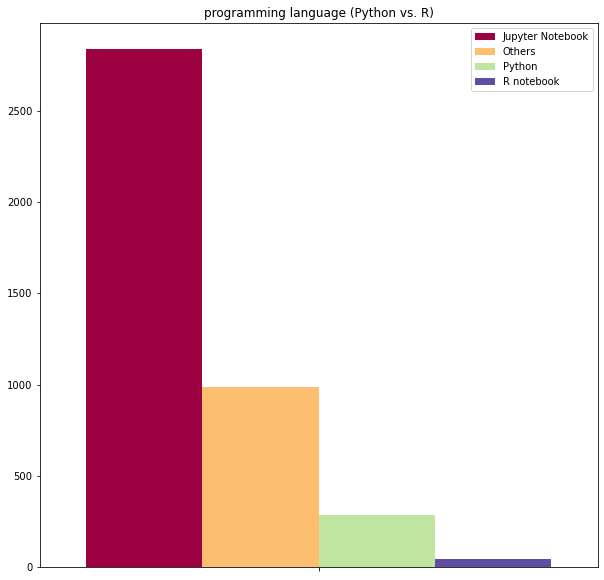

In [30]:
detect = ['Jupyter Notebook', 'Python', 'R notebook']
df['programming_language_count'] = [x if x in detect else 'Others' for x in df['programming_language']]

chart_feature('programming_language_count', stacked=False, margins=[-0.3, 0.3], label='programming language (Python vs. R)')

#add_guide('languages', df['programming_language'], drop=[''], sort=True, show=True)

print(df['programming_language_count'].value_counts())

['AGPL-3.0', 'Apache-2.0', 'BSD-2-Clause', 'BSD-3-Clause', 'CC-BY-4.0', 'CC-BY-SA-4.0', 'CC0-1.0', 'GPL-2.0', 'GPL-3.0', 'ISC', 'LGPL-3.0', 'MIT']
Apache-2.0      2169
                 581
MIT              201
GPL-3.0           40
BSD-3-Clause      35
AGPL-3.0           4
LGPL-3.0           4
BSD-2-Clause       4
GPL-2.0            4
CC-BY-SA-4.0       2
CC-BY-4.0          1
CC0-1.0            1
ISC                1
Name: license, dtype: int64


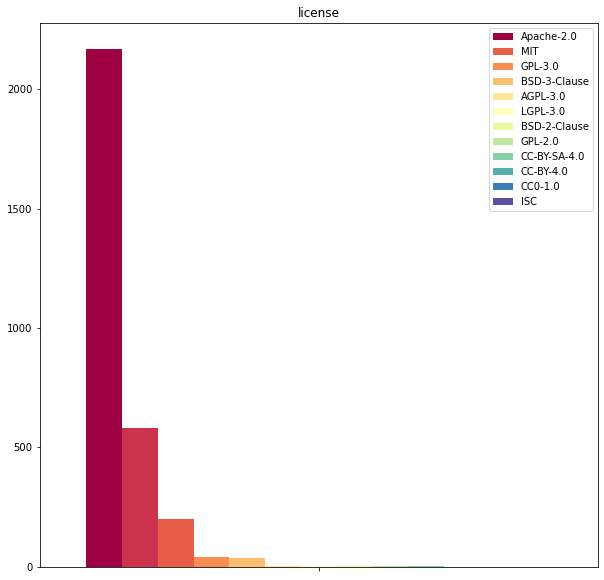

In [31]:
#rename = {'Apache 2.0': 'Apache-2.0', 'Learn more about GitHub Sponsors':None, 'Unlicense':None}
#df2 = pd.DataFrame(df['license'])
#df2["license"].replace(rename, inplace=True)

chart_feature('license', df=df, truncate_start=0, stacked=False, margins=[-0.3, 0.3])

add_guide('licenses', df['license'], drop=['','Unlicense','Learn more about GitHub Sponsors'], sort=True, show=True)

print(df['license'].value_counts())

mean: 1.7 median: 1.0


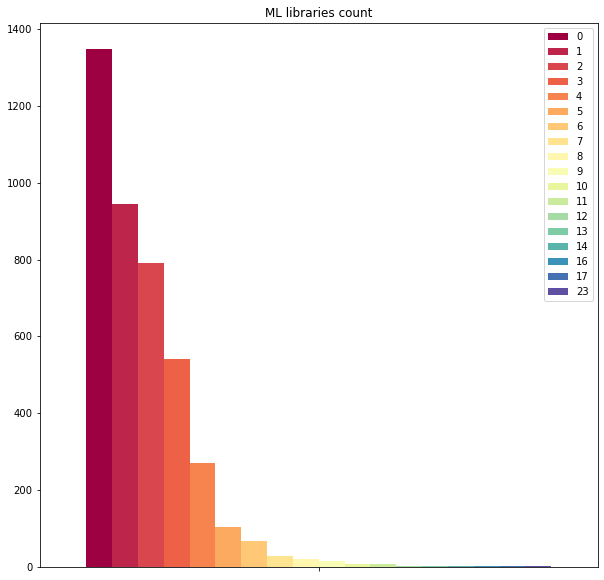

In [32]:
df['ml_libs_count'] = [len(x) if isinstance(x, list) else 0 for x in df['ml_libs']]
chart_feature('ml_libs_count', stacked=False, sort_index=True, margins=[-0.3, 0.3], label='ML libraries count')
print('mean:', round(df['ml_libs_count'].mean(),1), 'median:', round(df['ml_libs_count'].median(),1))

['Pillow', 'SimpleCV', 'SimpleITK', 'albumentations', 'autokeras', 'autosklearn', 'caffe', 'catboost', 'chainerrl', 'detectron', 'face_recognition', 'gensim', 'h2o', 'imutils', 'keras', 'lightgbm', 'mlbox', 'mxnet', 'nltk', 'opencv-python', 'openface', 'pattern', 'py-faster-rcnn', 'pylearn2', 'pytorch', 'pytorchcv', 'rl_coach', 'skimage', 'sklearn', 'spacy', 'stanza', 'statsmodels', 'tensorflow', 'textblob', 'theano', 'tpot', 'vocabulary', 'xgboost']
sklearn             1837
pattern              838
keras                803
tensorflow           716
xgboost              350
lightgbm             311
pytorch              302
nltk                 282
skimage              269
vocabulary           234
statsmodels          214
catboost             107
gensim               106
spacy                 93
albumentations        82
theano                65
Pillow                65
opencv-python         40
caffe                 38
textblob              34
mxnet                 30
h2o                 

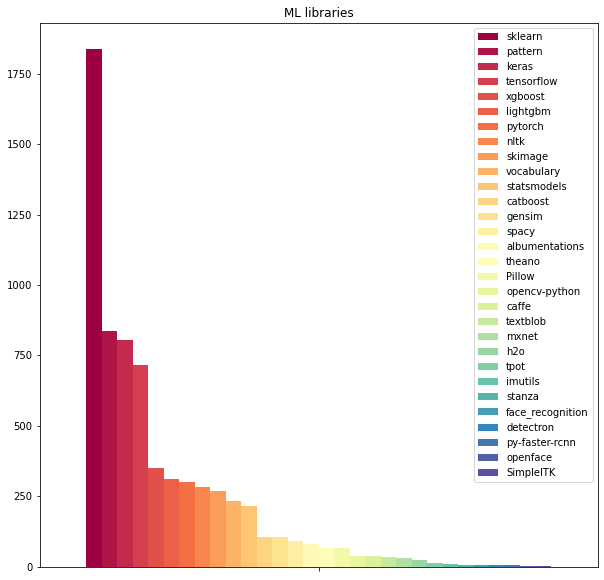

In [33]:
ml_libs = []
for item in df['ml_libs']:
    if isinstance(item, list):
        ml_libs.extend(item)
    
df2 = pd.DataFrame(ml_libs)
chart_feature(0, stacked=False, sort_index=False, df=df2, margins=[-0.3, 0.3], truncate=30, label='ML libraries')

add_guide('libs', df2[0], drop=[], sort=True, show=True)

print(df2[0].value_counts())

mean: 201863.4 median: 201904.0


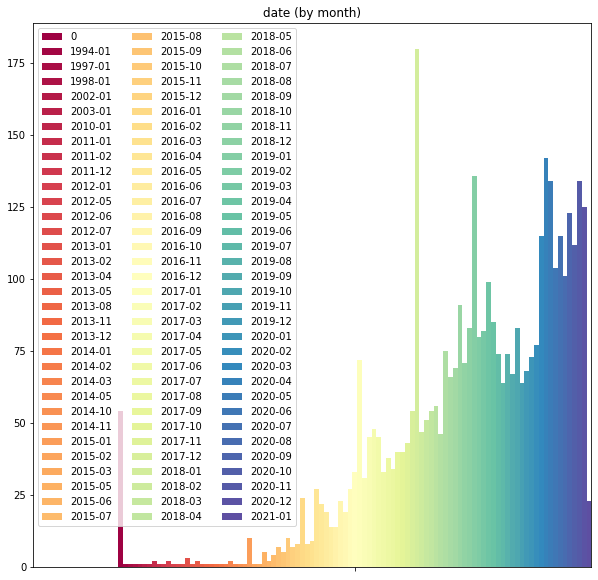

In [34]:
df['date_round'] = ['-'.join((x.split('-'))[0:2]) if isinstance(x, str) else '0' for x in df['date_project']]
df['date_round2'] = [int(''.join((x.split('-'))[0:2])) if isinstance(x, str) else None for x in df['date_project']]
chart_feature('date_round', stacked=False, sort_index=True, margins=[-0.34, 0.25], label='date (by month)', legend=1, columns=3, position='upper left')
print('mean:', round(df['date_round2'].mean(),1), 'median:', round(df['date_round2'].median(),1))

In [35]:
def date_to_quarter(date):
    date = date.split('-')[0:2]
    q = int(math.ceil(int(date[1]) / 3))
    date = date[0]+'-Q'+str(q)
    return date

dates = ['2018-01-01', '2019-02-31', '2018-04-01', '2019-06-31', '2018-09-01', '2019-12-31']
for date in dates:
    print(date_to_quarter(date))

2018-Q1
2019-Q1
2018-Q2
2019-Q2
2018-Q3
2019-Q4


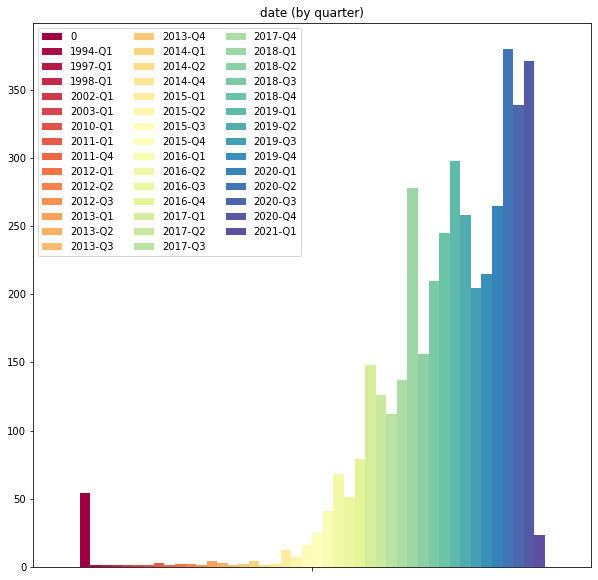

In [36]:
df['date_round'] = [date_to_quarter(x) if isinstance(x, str) else '0' for x in df['date_project']]
#df['date_round'] = [k:v for k,v in df['date_round'].items()]
chart_feature('date_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], label='date (by quarter)', legend=1, columns=3, position='upper left')
#print('mean:', round(df['date_round2'].mean(),1), 'median:', round(df['date_round2'].median(),1))

In [37]:
# generate full timespan
t = []
for i in range(1994,2021):
    for j in range(1,5):
        t.append('{y}-Q{q}'.format(y=i, q=j))
print(t)

['1994-Q1', '1994-Q2', '1994-Q3', '1994-Q4', '1995-Q1', '1995-Q2', '1995-Q3', '1995-Q4', '1996-Q1', '1996-Q2', '1996-Q3', '1996-Q4', '1997-Q1', '1997-Q2', '1997-Q3', '1997-Q4', '1998-Q1', '1998-Q2', '1998-Q3', '1998-Q4', '1999-Q1', '1999-Q2', '1999-Q3', '1999-Q4', '2000-Q1', '2000-Q2', '2000-Q3', '2000-Q4', '2001-Q1', '2001-Q2', '2001-Q3', '2001-Q4', '2002-Q1', '2002-Q2', '2002-Q3', '2002-Q4', '2003-Q1', '2003-Q2', '2003-Q3', '2003-Q4', '2004-Q1', '2004-Q2', '2004-Q3', '2004-Q4', '2005-Q1', '2005-Q2', '2005-Q3', '2005-Q4', '2006-Q1', '2006-Q2', '2006-Q3', '2006-Q4', '2007-Q1', '2007-Q2', '2007-Q3', '2007-Q4', '2008-Q1', '2008-Q2', '2008-Q3', '2008-Q4', '2009-Q1', '2009-Q2', '2009-Q3', '2009-Q4', '2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3'

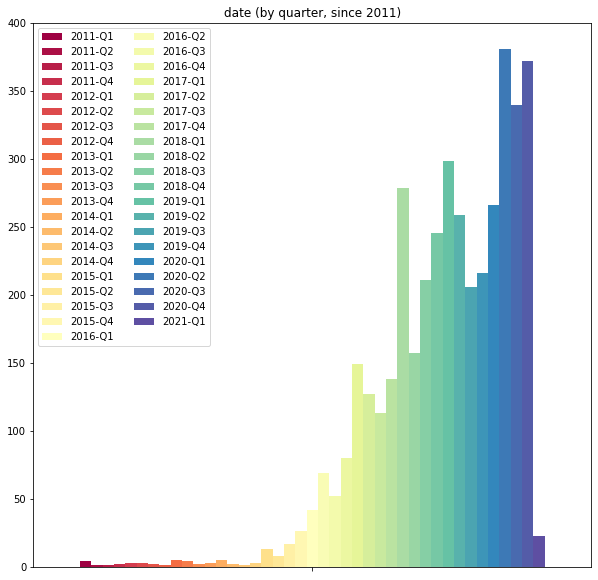

In [38]:
df['date_round'] = [date_to_quarter(x) if isinstance(x, str) else '0' for x in df['date_project']]
df2 = list(df['date_round']) + t
#for i in t:
#    if not i in df2:
#        df2.append(i)
df2 = [x if int(x.split('-')[0]) > 2010 else None for x in df2]
df2 = pd.DataFrame(df2)           

chart_feature(0, df=df2, stacked=False, sort_index=True, margins=[-0.3, 0.3], label='date (by quarter, since 2011)', legend=1, columns=2, position='upper left')
#print('mean:', round(df['date_round2'].mean(),1), 'median:', round(df['date_round2'].median(),1))

mean: 0.0 median: 0.0


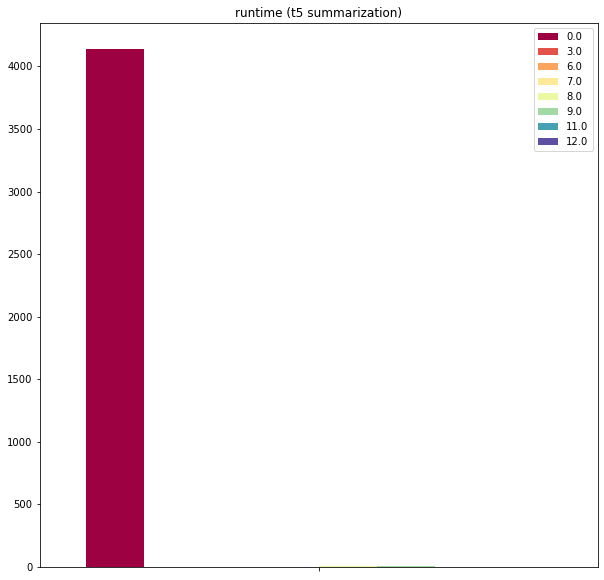

In [39]:
steps = 1
df['runtime_round'] = [round(x/steps,0)*steps if isinstance(x, float) and x != None else 0.0 for x in df['runtime']]
#df['runtime_round'] = [x if x > 0 else None for x in df['runtime_round']]
chart_feature('runtime_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], truncate_start=0, label='runtime (t5 summarization)')
print('mean:', round(df['runtime_round'].mean(),1), 'median:', round(df['runtime_round'].median(),1))

mean: 22.1 median: 16.0


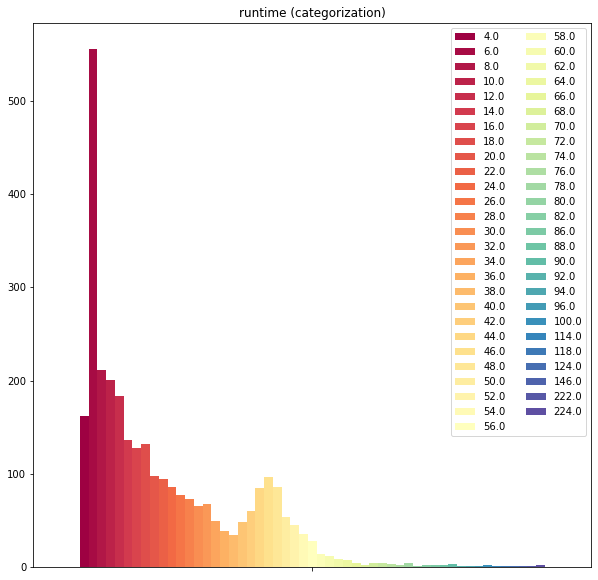

In [40]:
steps = 2
# df['runtime_round'] = [round(x+y/steps,0)*steps for x in df['runtime'] for y in df['runtime_cat']]
df['runtime_cat_round'] = [round(x/steps,0)*steps for x in df['runtime_cat']]
chart_feature('runtime_cat_round', stacked=False, sort_index=True, margins=[-0.3, 0.3], columns=2, label='runtime (categorization)')
print('mean:', round(df['runtime_cat_round'].mean(),1), 'median:', round(df['runtime_cat_round'].median(),1))

In [41]:
# store guide
print(list(form_guide.keys()))

path = '../elasticsearch/templates/guide.json'

store_data(form_guide, path, toJson=True)

['categories', 'subcategories', 'sources', 'kinds', 'engagement_score', 'tags', 'languages', 'licenses', 'libs']


7895